<a href="https://colab.research.google.com/github/patriciaanggraeni/PCVK_Ganjil_2023/blob/main/week_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Import Library

In [69]:
import cv2 as cv
import numpy as np
import math, os, glob
import matplotlib.pyplot as plt

from google.colab import drive
from google.colab.patches import cv2_imshow
from skimage import io
from sklearn.cluster import KMeans

### 2. Mount Drive

In [5]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### 3. Buatlah histogram citra seperti output histogram

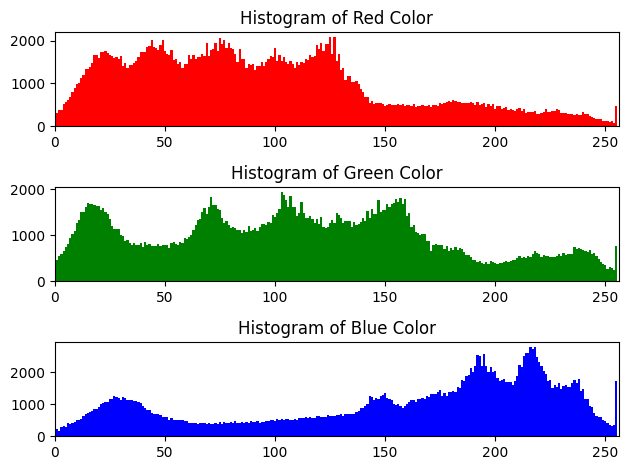

In [25]:
def inputImage(img):
  image = cv.imread(img)
  image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  return image;

path = '/content/drive/MyDrive/PCVK/Images/lena.jpg'
image = inputImage(path)

blue_channel, green_channel, red_channel = cv.split(image)

histogram_blue = cv.calcHist([blue_channel], [0], None, [256], [0, 256])
histogram_green = cv.calcHist([green_channel], [0], None, [256], [0, 256])
histogram_red = cv.calcHist([red_channel], [0], None, [256], [0, 256])

plt.subplot(3, 1, 1)
plt.title("Histogram of Red Color")
plt.bar(range(256), histogram_red[:, 0], color='r', width=1)
plt.xlim([0, 256])

plt.subplot(3, 1, 3)
plt.title("Histogram of Blue Color")
plt.bar(range(256), histogram_blue[:, 0], color='b', width=1)
plt.xlim([0, 256])

plt.subplot(3, 1, 2)
plt.title("Histogram of Green Color")
plt.bar(range(256), histogram_green[:, 0], color='g', width=1)
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

### 4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”.

<ipython-input-63-3718ffe95695>:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 1, 1)


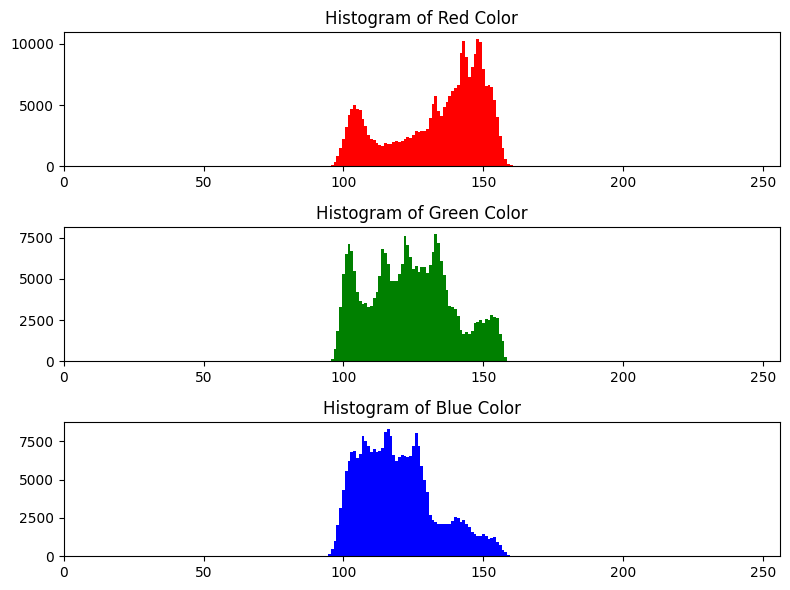

In [63]:
# Pisahkan saluran warna
blue_channel, green_channel, red_channel = cv.split(image)

# Menghitung histogram untuk setiap saluran warna menggunakan numpy.histogram
hist_blue, bins_blue = np.histogram(blue_channel.ravel(), bins=256, range=[0, 256])
hist_green, bins_green = np.histogram(green_channel.ravel(), bins=256, range=[0, 256])
hist_red, bins_red = np.histogram(red_channel.ravel(), bins=256, range=[0, 256])

# Menampilkan histogram per saluran warna
plt.figure(figsize=(8, 6))
plt.title('Histogram Per Saluran Warna')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

# Menampilkan histogram warna biru
plt.subplot(3, 1, 1)
plt.title("Histogram of Red Color")
plt.bar(range(256), hist_red, color='r', width=1)
plt.xlim([0, 256])

# Menampilkan histogram warna hijau
plt.subplot(3, 1, 2)
plt.title("Histogram of Green Color")
plt.bar(range(256), hist_green, color='g', width=1)
plt.xlim([0, 256])

# Menampilkan histogram warna merah
plt.subplot(3, 1, 3)
plt.title("Histogram of Blue Color")
plt.bar(range(256), hist_blue, color='b', width=1)
plt.xlim([0, 256])

plt.xlim([0, 256])

plt.tight_layout()
plt.show()

### 5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization

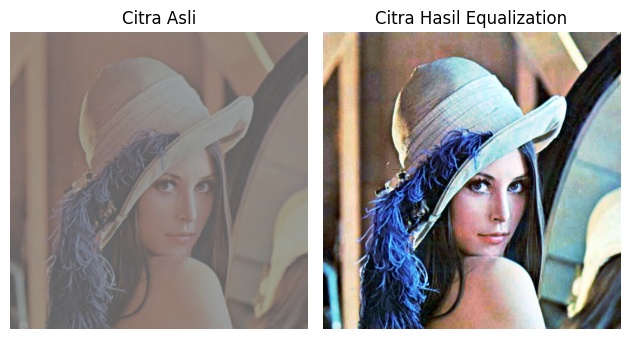

In [68]:
path = '/content/drive/MyDrive/PCVK/Images/lena_lc.jpg'

image_lc_bgr = cv.imread(path)
image_lc_rgb = cv.cvtColor(image_lc_bgr, cv.COLOR_BGR2RGB)
channels = cv.split(image_lc_rgb)

equalized_channels = []
for channel in channels:
    hist, bins = np.histogram(channel.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
    equalized_channel = np.interp(channel.flatten(), range(256), cdf_normalized).reshape(channel.shape)

    equalized_channels.append(equalized_channel.astype(np.uint8))

image_equalized = cv.merge(equalized_channels)

plt.subplot(1, 2, 1)
plt.imshow(image_lc_rgb)
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_equalized)
plt.title('Citra Hasil Equalization')
plt.axis('off')

plt.tight_layout()
plt.show()

### 6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”.

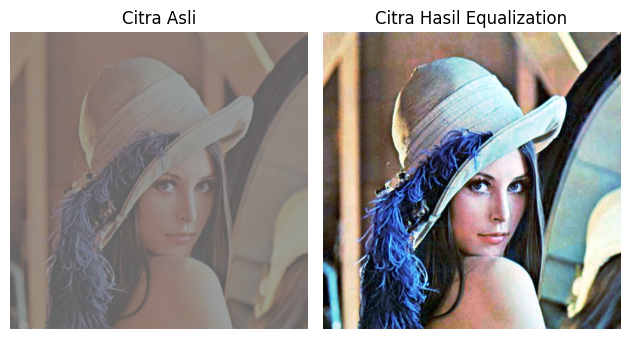

In [67]:
path = '/content/drive/MyDrive/PCVK/Images/lena_lc.jpg'
image_lc_bgr = cv.imread(path)
image_lc_rgb = cv.cvtColor(image_lc_bgr, cv.COLOR_BGR2RGB)

r, g, b = cv.split(image_lc_rgb)
r_eq = cv.equalizeHist(r)
g_eq = cv.equalizeHist(g)
b_eq = cv.equalizeHist(b)
image_eq = cv.merge([r_eq, g_eq, b_eq])

plt.subplot(1, 2, 1)
plt.imshow(image_lc_rgb)
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_eq)
plt.title('Citra Hasil Equalization')
plt.axis('off')

plt.tight_layout()
plt.show()

### 7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih

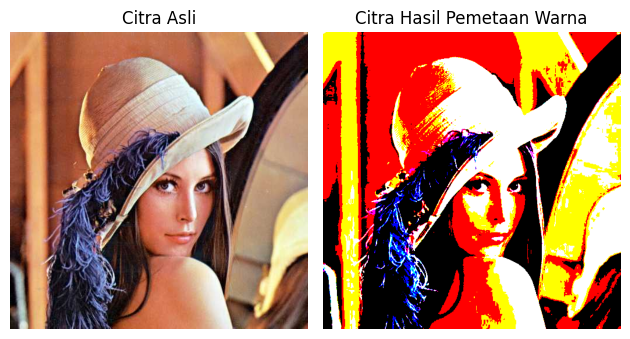

In [74]:
path = '/content/drive/MyDrive/PCVK/Images/lena.jpg'

image_bgr = cv.imread(path)
image_rgb = cv.cvtColor(image_bgr, cv.COLOR_BGR2RGB)

def map_colors(pixel):
    r, g, b = pixel
    if r < 128 and g < 128 and b < 128:
        return [0, 0, 0]  # Hitam
    elif r >= 128 and g < 128 and b < 128:
        return [255, 0, 0]  # Merah
    elif r < 128 and g >= 128 and b < 128:
        return [0, 255, 0]  # Hijau
    elif r >= 128 and g >= 128 and b < 128:
        return [255, 255, 0]  # Kuning
    elif r < 128 and g < 128 and b >= 128:
        return [0, 0, 255]  # Biru
    elif r >= 128 and g < 128 and b >= 128:
        return [255, 0, 255]  # Magenta
    elif r < 128 and g >= 128 and b >= 128:
        return [0, 255, 255]  # Cyan
    else:
        return [255, 255, 255]  # Putih

mapped_image = np.array([[map_colors(pixel) for pixel in row] for row in image_rgb])

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mapped_image)
plt.title('Citra Hasil Pemetaan Warna')
plt.axis('off')

plt.tight_layout()
plt.show()

### 8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman modul ini!

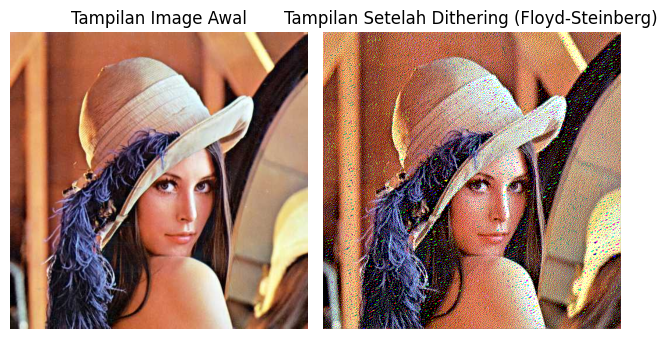

In [81]:
# Path gambar di Google Drive
path = '/content/drive/MyDrive/PCVK/Images/lena.jpg'

# Baca gambar dengan format BGR
image_lc_bgr = cv.imread(path)

# Fungsi untuk menerapkan dithering Floyd-Steinberg pada satu saluran warna
def dither_channel(channel):
    height, width = channel.shape
    for y in range(height - 1):
        for x in range(1, width - 1):
            old_pixel = channel[y, x]
            new_pixel = 255 if old_pixel > 128 else 0
            error = old_pixel - new_pixel
            channel[y, x] = new_pixel
            channel[y, x + 1] += error * 7 / 16
            channel[y + 1, x - 1] += error * 3 / 16
            channel[y + 1, x] += error * 5 / 16
            channel[y + 1, x + 1] += error * 1 / 16
    return channel

# Pisahkan saluran warna
r, g, b = cv.split(image_lc_bgr)

# Terapkan dithering Floyd-Steinberg pada setiap saluran warna
dithered_r = dither_channel(np.copy(r))
dithered_g = dither_channel(np.copy(g))
dithered_b = dither_channel(np.copy(b))

# Gabungkan kembali saluran warna yang sudah di-dithering
dithered_image = cv.merge([dithered_r, dithered_g, dithered_b])

# Menampilkan tampilan awal gambar
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image_lc_bgr, cv.COLOR_BGR2RGB))
plt.title('Tampilan Image Awal')
plt.axis('off')

# Menampilkan tampilan gambar setelah dithering
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(dithered_image, cv.COLOR_BGR2RGB))
plt.title('Tampilan Setelah Dithering (Floyd-Steinberg)')
plt.axis('off')

plt.tight_layout()
plt.show()

### 9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg

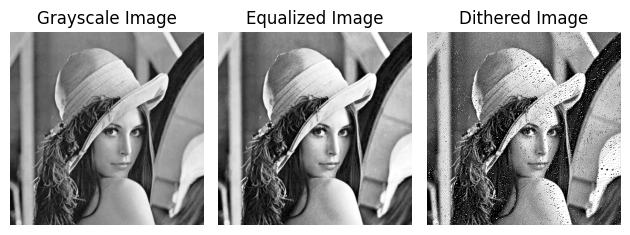

In [85]:
path = '/content/drive/MyDrive/PCVK/Images/lena_lc.jpg'
image_lc_bgr = cv.imread(path)
gray_image = cv.cvtColor(image_lc_bgr, cv.COLOR_BGR2GRAY)
equalized_image = cv.equalizeHist(gray_image)

def dither_channel(channel):
    height, width = channel.shape
    for y in range(height - 1):
        for x in range(1, width - 1):
            old_pixel = channel[y, x]
            new_pixel = 255 if old_pixel > 128 else 0
            error = old_pixel - new_pixel
            channel[y, x] = new_pixel
            channel[y, x + 1] += error * 7 / 16
            channel[y + 1, x - 1] += error * 3 / 16
            channel[y + 1, x] += error * 5 / 16
            channel[y + 1, x + 1] += error * 1 / 16
    return channel

dithered_image = dither_channel(np.copy(equalized_image))

plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(dithered_image, cmap='gray')
plt.title('Dithered Image')
plt.axis('off')

plt.tight_layout()
plt.show()
